### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

In [1]:
import pandas as pd
import numpy as np

cs_df = pd.read_csv('./datasets/customer_shopping_data.csv')
cs_df.info()
cs_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [2]:
cs_df.isna().sum() # 결측치 없음 

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [3]:
# 컬럼 명 변경 
cs_df.columns = ['invoice', 'id', 'gender', 'age', 'category','quantity', 'price', 'payment', 'date', 'mall']

In [4]:
cs_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
cs_df.duplicated().sum() # 중복된 행 없음 

0

In [6]:
cs_df.value_counts()

invoice  id       gender  age  category         quantity  price    payment      date        mall             
I100008  C199951  Male    65   Clothing         5         1500.40  Cash         10/7/2022   Emaar Square Mall    1
I312466  C139574  Female  67   Clothing         4         1200.32  Credit Card  22/09/2021  Kanyon               1
I312529  C419632  Female  35   Food & Beverage  2         10.46    Credit Card  6/11/2021   Viaport Outlet       1
I312524  C123511  Female  68   Clothing         5         1500.40  Cash         5/2/2021    Zorlu Center         1
I312523  C248293  Male    35   Technology       1         1050.00  Cash         23/04/2022  Kanyon               1
                                                                                                                ..
I206379  C272482  Male    31   Shoes            2         1200.34  Debit Card   8/9/2022    Metrocity            1
I206377  C238664  Male    38   Food & Beverage  5         26.15    Credit Card  23/02

In [7]:
cs_df[cs_df['quantity'] < 0 ] # price, quantity 모두 음수 or 0 인 데이터는 없음 ! 

,invoice,id,gender,age,category,quantity,price,payment,date,mall


In [250]:
cs_df[cs_df['price'] < 0 ]

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate


In [249]:
cs_df[cs_df['quantity'] == 0 ]

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate


In [8]:
# cs_df['date'] = pd.to_datetime(cs_df['date']).dt.strftime('%Y/%m/%d')

# format=년/월/일 형식으로 바꿔줌
cs_df['date'] = pd.to_datetime(cs_df['date'], format='%d/%m/%Y')
cs_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


In [9]:
cs_df['date'].sort_values() # 가장 최신 날짜 : 2023-03-08

36199   2021-01-01
78539   2021-01-01
27812   2021-01-01
27856   2021-01-01
5323    2021-01-01
           ...    
20863   2023-03-08
20879   2023-03-08
61644   2023-03-08
27871   2023-03-08
60463   2023-03-08
Name: date, Length: 99457, dtype: datetime64[ns]

In [10]:
# 현재 날짜에서 날짜의 차를 Subdate 컬럼에 저장 
cs_df['Subdate'] = (pd.to_datetime('2023-03-09') - pd.to_datetime(cs_df['date'])).dt.days
cs_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723


In [11]:
# Recency 구하기 

cs_rf_df = cs_df.groupby('id')['Subdate'].min().reset_index()
cs_rf_df.columns = ['id', 'Recency']
cs_rf_df
    

,id,Recency
0,C100004,468
1,C100005,6
2,C100006,98
3,C100012,571
4,C100019,592
...,...,...
99452,C999886,1
99453,C999910,124
99454,C999974,303
99455,C999976,262


In [12]:
# Frequency 구하기 
# agg 함수를 통해서 사용자 id에 해당되는 Recency와 Frequency를 한번에 구해보자 
# Recency에는 Recency의 최소값(min)을 가져오고, Frequency에는 합계(count)를 가져오는 동작을 agg 함수로 한번에 처리 
cs_rf_df = cs_rf_df.groupby('id').agg(Recency=('Recency','min'), Frequency=('id','count'))
cs_rf_df

,Recency,Frequency
id,,
C100004,468,1
C100005,6,1
C100006,98,1
C100012,571,1
C100019,592,1
...,...,...
C999886,1,1
C999910,124,1
C999974,303,1


In [13]:
cs_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723


In [14]:
# # Monetary 구하기 

# mf_df = co_df.copy(): 'co_df' 데이터프레임을 얕은 복사하여 'mf_df' 데이터프레임을 생성
# 이는 'co_df'와 동일한 내용을 가진 새로운 데이터프레임을 만들어서 다른 변수명으로 참조하게 된다. 
# 얕은 복사를 사용하는 이유는 원본 데이터프레임의 내용을 변경하지 않고 새로운 변수로 복사하기 위함이다.
# mf_df에는 기존 co_df를 얕은복사 한 co_df.copy() 
# Monetary 라는 새로운 열을 생성.

mf_df = cs_df.copy()
mf_df.loc[:,'Monetary'] = mf_df['quantity'] * mf_df['price']
mf_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate,Monetary
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723,16800.00


In [15]:
mf_df = mf_df.groupby('id')[['Monetary']].sum()
mf_df

,Monetary
id,
C100004,7502.00
C100005,2400.68
C100006,322.56
C100012,130.75
C100019,35.84
...,...
C999886,47.07
C999910,136.35
C999974,7502.00


In [16]:
rfm_df = cs_rf_df.merge(mf_df, on='id')
rfm_df

,Recency,Frequency,Monetary
id,,,
C100004,468,1,7502.00
C100005,6,1,2400.68
C100006,98,1,322.56
C100012,571,1,130.75
C100019,592,1,35.84
...,...,...,...
C999886,1,1,47.07
C999910,124,1,136.35
C999974,303,1,7502.00


In [17]:
rfm_df = rfm_df.reset_index()
rfm_df

,id,Recency,Frequency,Monetary
0,C100004,468,1,7502.00
1,C100005,6,1,2400.68
2,C100006,98,1,322.56
3,C100012,571,1,130.75
4,C100019,592,1,35.84
...,...,...,...,...
99452,C999886,1,1,47.07
99453,C999910,124,1,136.35
99454,C999974,303,1,7502.00
99455,C999976,262,1,322.56


In [18]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()
rfm_df[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

rfm_df

In [252]:
rfm_df.loc[rfm_df['Frequency'] == 0.0, 'Frequency'] = 1

rfm_df

,id,Recency,Frequency,Monetary,TotalScore
0,C100004,0.413317,1.0,0.285648,1.698965
1,C100005,0.993719,1.0,0.091273,2.084992
2,C100006,0.878141,1.0,0.012091,1.890232
3,C100012,0.283920,1.0,0.004783,1.288702
4,C100019,0.257538,1.0,0.001166,1.258704
...,...,...,...,...,...
99452,C999886,1.000000,1.0,0.001594,2.001594
99453,C999910,0.845477,1.0,0.004996,1.850473
99454,C999974,0.620603,1.0,0.285648,1.906251
99455,C999976,0.672111,1.0,0.012091,1.684202


In [20]:
rfm_df['Recency'] = 1 - rfm_df['Recency']
rfm_df

,id,Recency,Frequency,Monetary
0,C100004,0.413317,1.0,0.285648
1,C100005,0.993719,1.0,0.091273
2,C100006,0.878141,1.0,0.012091
3,C100012,0.283920,1.0,0.004783
4,C100019,0.257538,1.0,0.001166
...,...,...,...,...
99452,C999886,1.000000,1.0,0.001594
99453,C999910,0.845477,1.0,0.004996
99454,C999974,0.620603,1.0,0.285648
99455,C999976,0.672111,1.0,0.012091


In [21]:
rfm_df['TotalScore'] = rfm_df[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm_df

,id,Recency,Frequency,Monetary,TotalScore
0,C100004,0.413317,1.0,0.285648,1.698965
1,C100005,0.993719,1.0,0.091273,2.084992
2,C100006,0.878141,1.0,0.012091,1.890232
3,C100012,0.283920,1.0,0.004783,1.288702
4,C100019,0.257538,1.0,0.001166,1.258704
...,...,...,...,...,...
99452,C999886,1.000000,1.0,0.001594,2.001594
99453,C999910,0.845477,1.0,0.004996,1.850473
99454,C999974,0.620603,1.0,0.285648,1.906251
99455,C999976,0.672111,1.0,0.012091,1.684202


In [22]:
cs_rfm_df = cs_df.merge(rfm_df[['id', 'TotalScore']], on='id')
cs_rfm_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate,TotalScore
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216,2.015548
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452,1.639031
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485,1.403194
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662,1.741103
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501,1.380896
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169,1.799919
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533,1.332256
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711,1.108638
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723,1.732893


In [23]:
import numpy as np

l1, l2, l3, l4 = np.percentile(cs_rfm_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

1.27647561139451 1.4894781055999933 1.7951511068518742 1.996541335788667


In [24]:
# 각 범위에 따라 레벨을 나눈다.
def get_level(x):
    if x < l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3 :
        return 3
    if x > l3 and x <= l4 :
        return 2
    return 1

In [25]:
cs_rfm_df['Level'] = cs_rfm_df['TotalScore'].apply(get_level)
cs_rfm_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate,TotalScore,Level
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216,2.015548,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452,1.639031,3
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485,1.403194,4
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662,1.741103,3
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501,1.380896,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169,1.799919,2
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533,1.332256,4
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711,1.108638,5
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723,1.732893,3


In [27]:
cs_rfm_df['Level'] = cs_rfm_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Silver', 'Gold','Diamond','VIP'])
cs_rfm_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate,TotalScore,Level
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216,2.015548,VIP
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452,1.639031,Gold
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485,1.403194,Silver
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662,1.741103,Gold
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501,1.380896,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169,1.799919,Diamond
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533,1.332256,Silver
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711,1.108638,Bronze
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723,1.732893,Gold


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

print(cs_rfm_df['Level'].value_counts())

Level
Gold       29835
Diamond    19895
Silver     19894
Bronze     19887
VIP         9946
Name: count, dtype: int64


In [73]:
import numpy as np

a1, a2, a3, a4, a5 = np.percentile(cs_rfm_df['age'], [15, 35, 55, 75, 80])
print(a1, a2, a3, a4)

25.0 36.0 46.0 56.0


In [74]:
# 각 범위에 따라 레벨을 나눈다.
def get_level(x):
    if x <= a1:
        return 5
    if x > a1 and x <= a2:
        return 4
    if x > a2 and x <= a3 :
        return 3
    if x > a3 and x <= a4 :
        return 2
    return 1

In [75]:
cs_rfm_df['Age'] = cs_rfm_df['age'].apply(get_level)
cs_rfm_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate,TotalScore,Level,Age
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216,2.015548,VIP,4
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452,1.639031,Gold,5
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485,1.403194,Silver,5
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662,1.741103,Gold,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501,1.380896,Silver,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169,1.799919,Diamond,3
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533,1.332256,Silver,4
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711,1.108638,Bronze,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723,1.732893,Gold,2


In [76]:
cs_rfm_df['Age'] = cs_rfm_df['Age'].replace([5,4,3,2,1], ['10-25', '25-35', '35-45','45-55','55-'])
cs_rfm_df

,invoice,id,gender,age,category,quantity,price,payment,date,mall,Subdate,TotalScore,Level,Age
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216,2.015548,VIP,25-35
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452,1.639031,Gold,10-25
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485,1.403194,Silver,10-25
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662,1.741103,Gold,55-
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501,1.380896,Silver,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169,1.799919,Diamond,35-45
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533,1.332256,Silver,25-35
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711,1.108638,Bronze,55-
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723,1.732893,Gold,45-55


In [224]:
cs_rfm_df['Level'].value_counts()

Level
Gold       29835
Diamond    19895
Silver     19894
Bronze     19887
VIP         9946
Name: count, dtype: int64

In [253]:
cs_rfm_df['Age'].value_counts()

Age
55-      24671
25-35    21013
35-45    19393
45-55    19021
10-25    15359
Name: count, dtype: int64

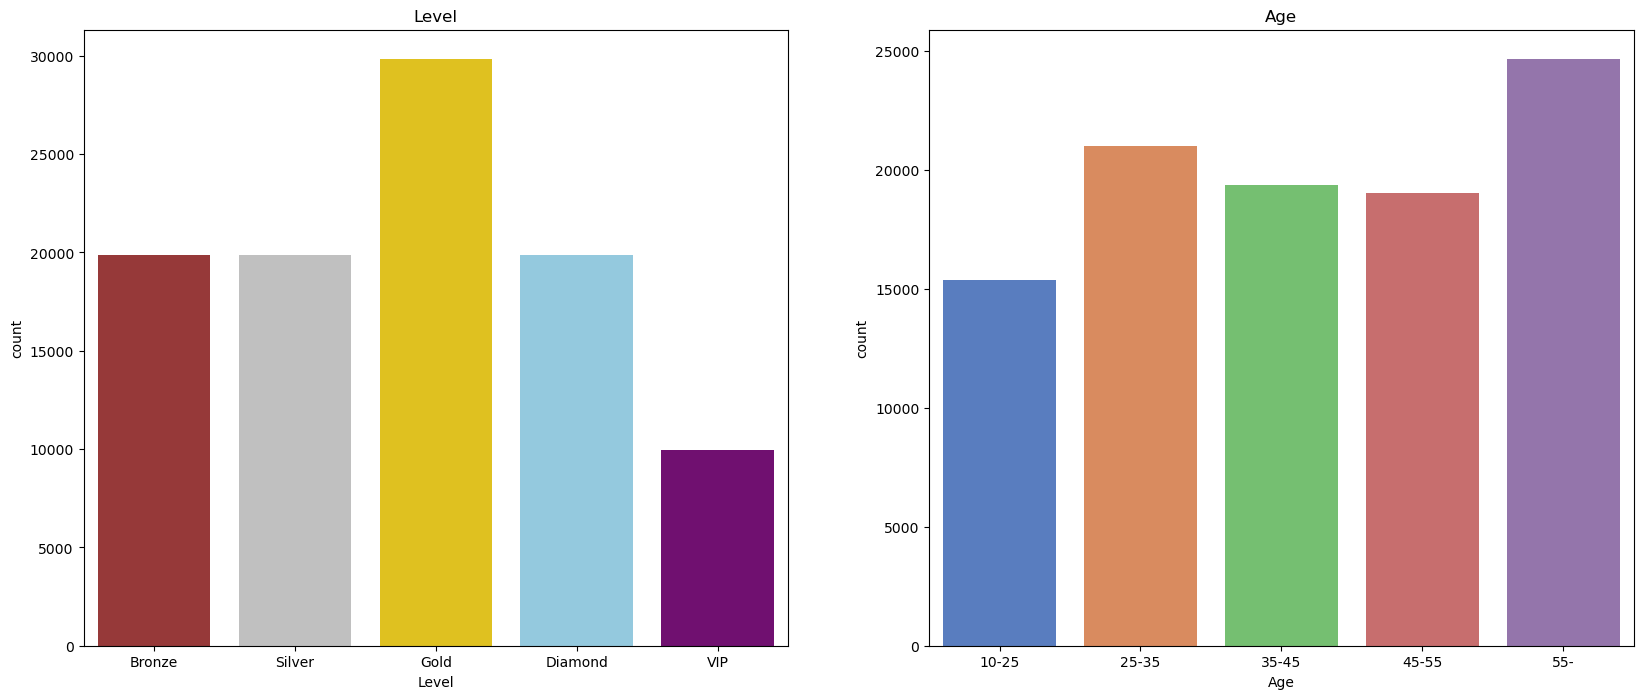

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
age_columns = ['10-25', '25-35', '35-45','45-55','55-']
order_columns = ['Bronze', 'Silver', 'Gold','Diamond','VIP']
colors = {'Bronze': 'brown', 'Silver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}

sns.countplot(ax=axes[0], x='Level', data=cs_rfm_df, palette=colors, order=order_columns)
axes[0].set_title('Level')

sns.countplot(ax=axes[1], x='Age', data=cs_rfm_df, palette='muted', order=age_columns)
axes[1].set_title('Age')

plt.show()


In [148]:
cs_rfm_df['payment'].value_counts()
cs_rfm_df['mall'].value_counts()

mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

,mall,Level,count
0,Istinye Park,Bronze,1913
1,Istinye Park,Diamond,1962
2,Istinye Park,Gold,2983
3,Istinye Park,Silver,1938
4,Istinye Park,VIP,985
5,Kanyon,Bronze,3910
6,Kanyon,Diamond,4047
7,Kanyon,Gold,5924
8,Kanyon,Silver,3954
9,Kanyon,VIP,1988


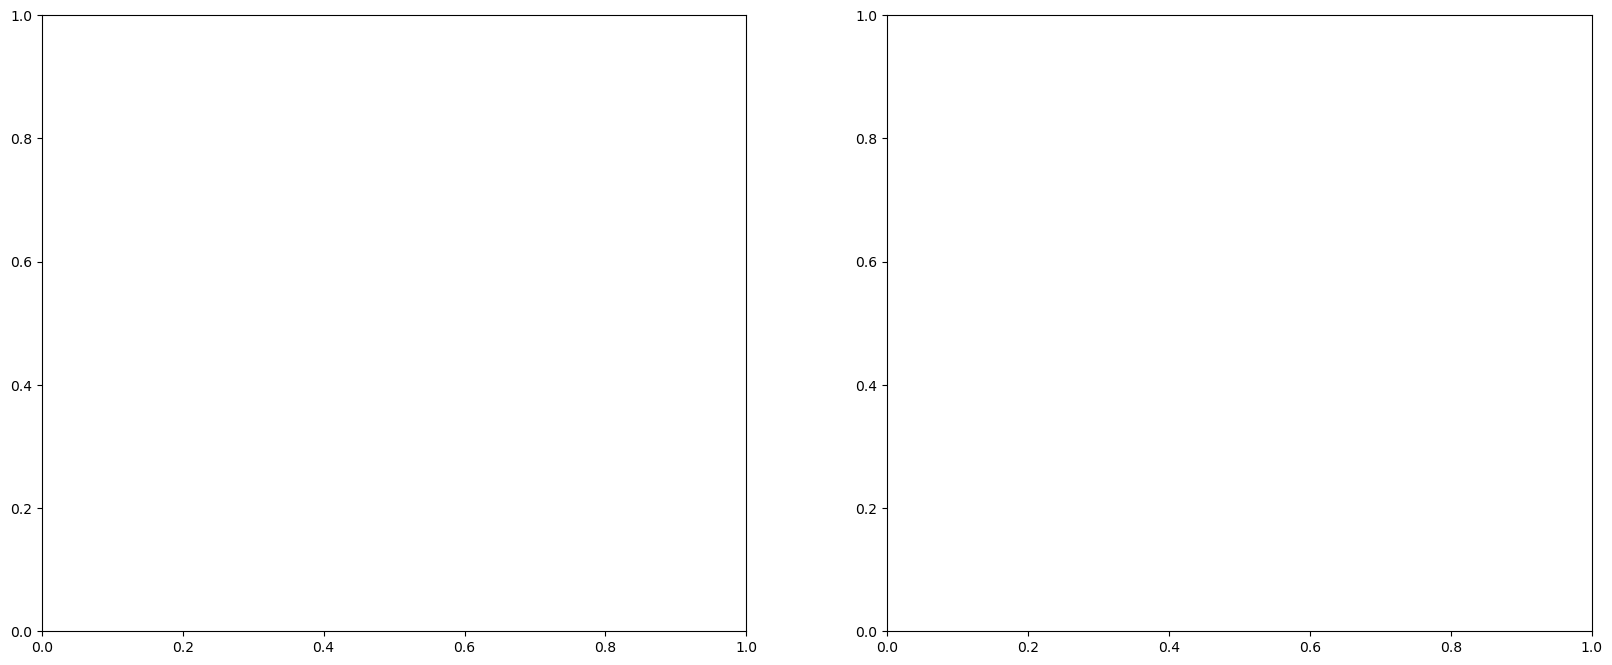

In [93]:
import pandas as pd


# 상위 5개의 'mall'을 선택
top_malls = mall_counts.head(5)

# 'mall'을 기준으로 그룹화하고 각 'mall'의 카테고리 별 개수를 계산
cs_mall = cs_rfm_df[cs_rfm_df['mall'].isin(top_malls.index)].groupby(['mall', 'Level']).size()

# 결과를 데이터프레임으로 변환
cs_mall = cs_mall.reset_index(name='count')

# 상위 5개의 'mall'에 대해서만 출력
display(cs_mall)


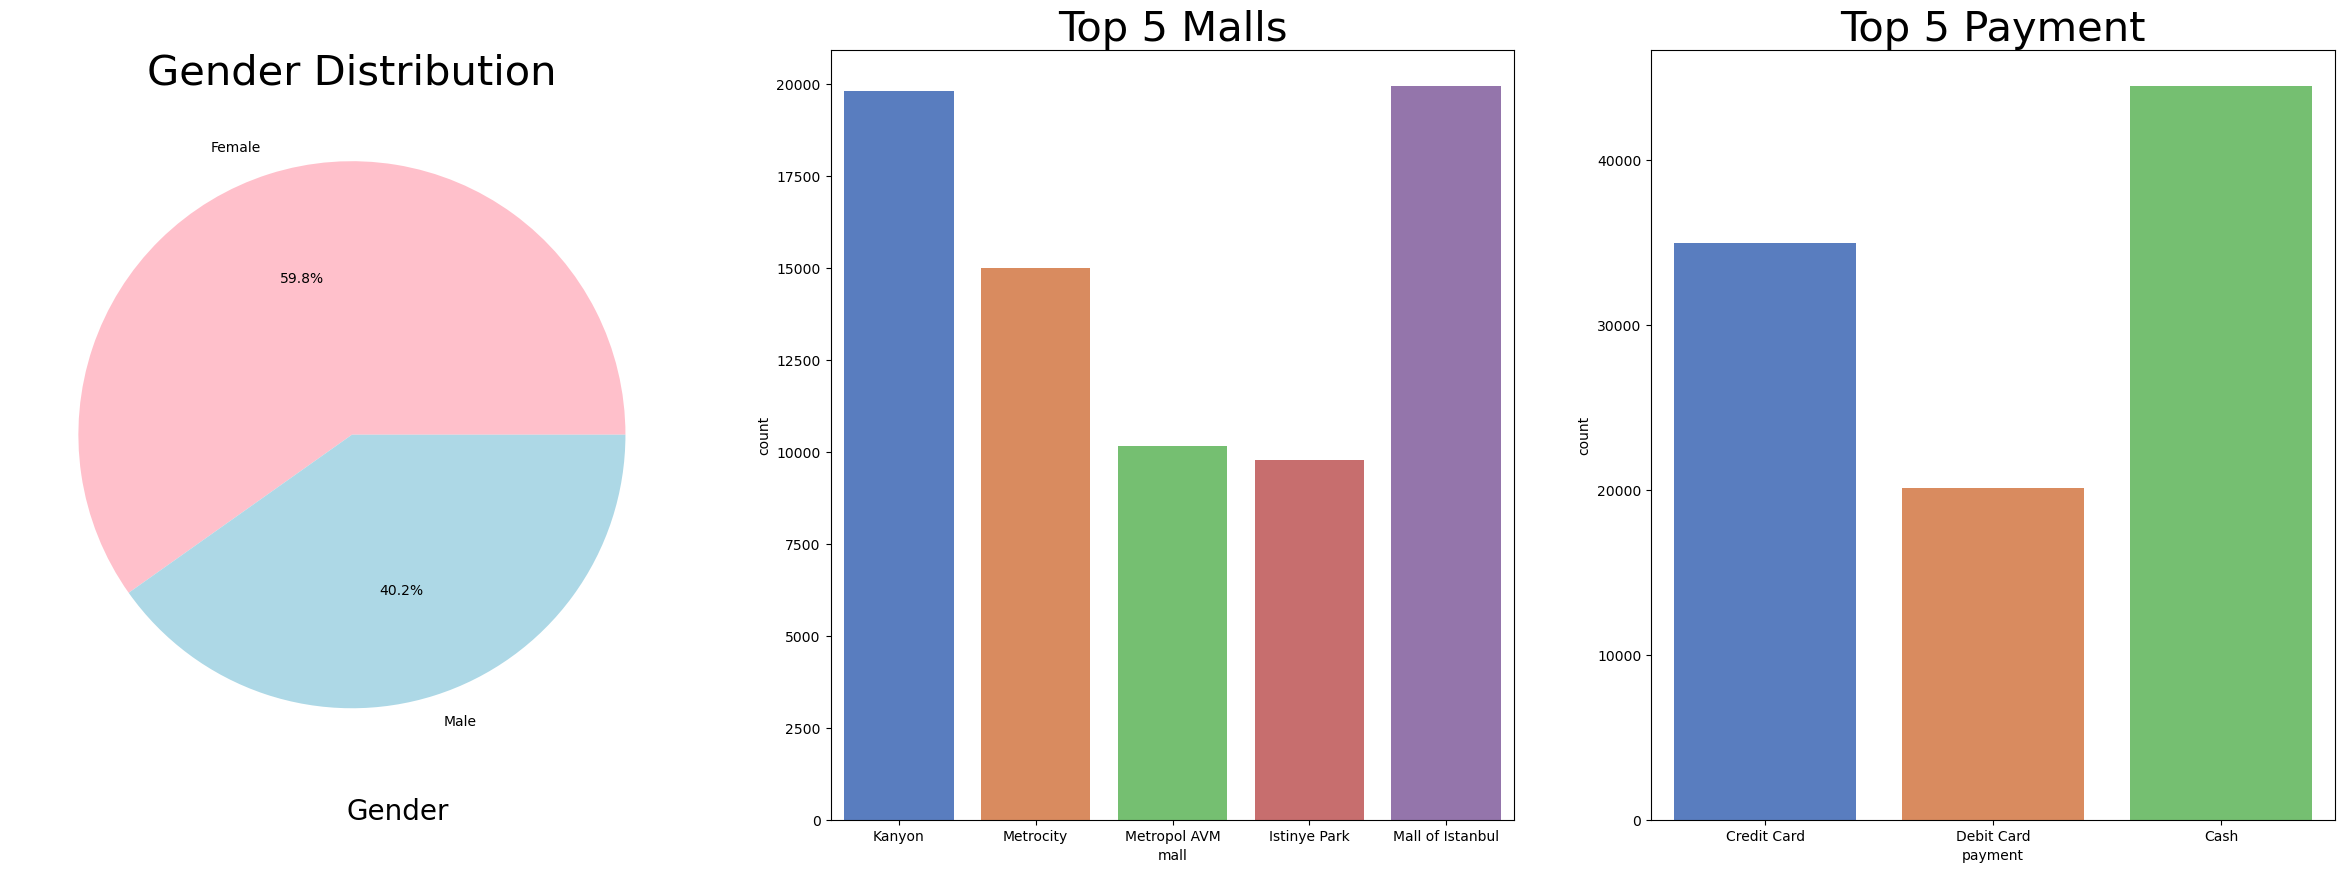

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mall_counts = cs_rfm_df['mall'].value_counts()

# 상위 5개의 mall을 선택한다.
top_malls = mall_counts.head(5)

# 데이터프레임에서 쇼핑몰 존재여부 검사 
mall_filtered_df = cs_rfm_df[cs_rfm_df['mall'].isin(top_malls.index)]

# 파이 차트
gender_counts = cs_rfm_df['gender'].value_counts()
labels = gender_counts.index
values = gender_counts.values
colors = ['pink', 'lightblue']

# payment_counts = cs_rfm_df['payment'].value_counts()
# labels1 = payment_counts.index
# values1 = payment_counts.values
# payment_colors = ['green','blue','red']



fig, axes = plt.subplots(1, 3, figsize=(30, 10))


axes[0].pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Gender Distribution', fontsize=30)


# 집계 차트
sns.countplot(ax=axes[1], x='mall', data=mall_filtered_df, palette='muted')
axes[1].set_title('Top 5 Malls', fontsize=30)


sns.countplot(ax=axes[2], x='payment', data=cs_rfm_df, palette='muted')
axes[2].set_title('Top 5 Payment', fontsize=30)

plt.show()


#### 데이터 분석 결과 
- 우선 여성 회원의 비율이 60%, 남성 회원의 비율이 40%로 여성 회원이 남성회원보다 비중이 더 많다는 것을 알게되었습니다.
- 쇼핑몰의 경우 상위 5개 쇼핑몰을 추출한 결과 Mall of Istanbul과, Kanyon 쇼핑몰이 가장 많은 비중을 차지 하였음을 알게되었습니다. 그 다음으로 Metrocity 순으로 Metropol AVM mall, Istinye Park 순으로 높은 것을 알 수 있었습니다.
- 결제 수단의 경우에는 현금결제가 가장 많았고, 그 다음으로 신용 카드, 직불 카드 순으로 높은 것을 알 수 있었습니다.

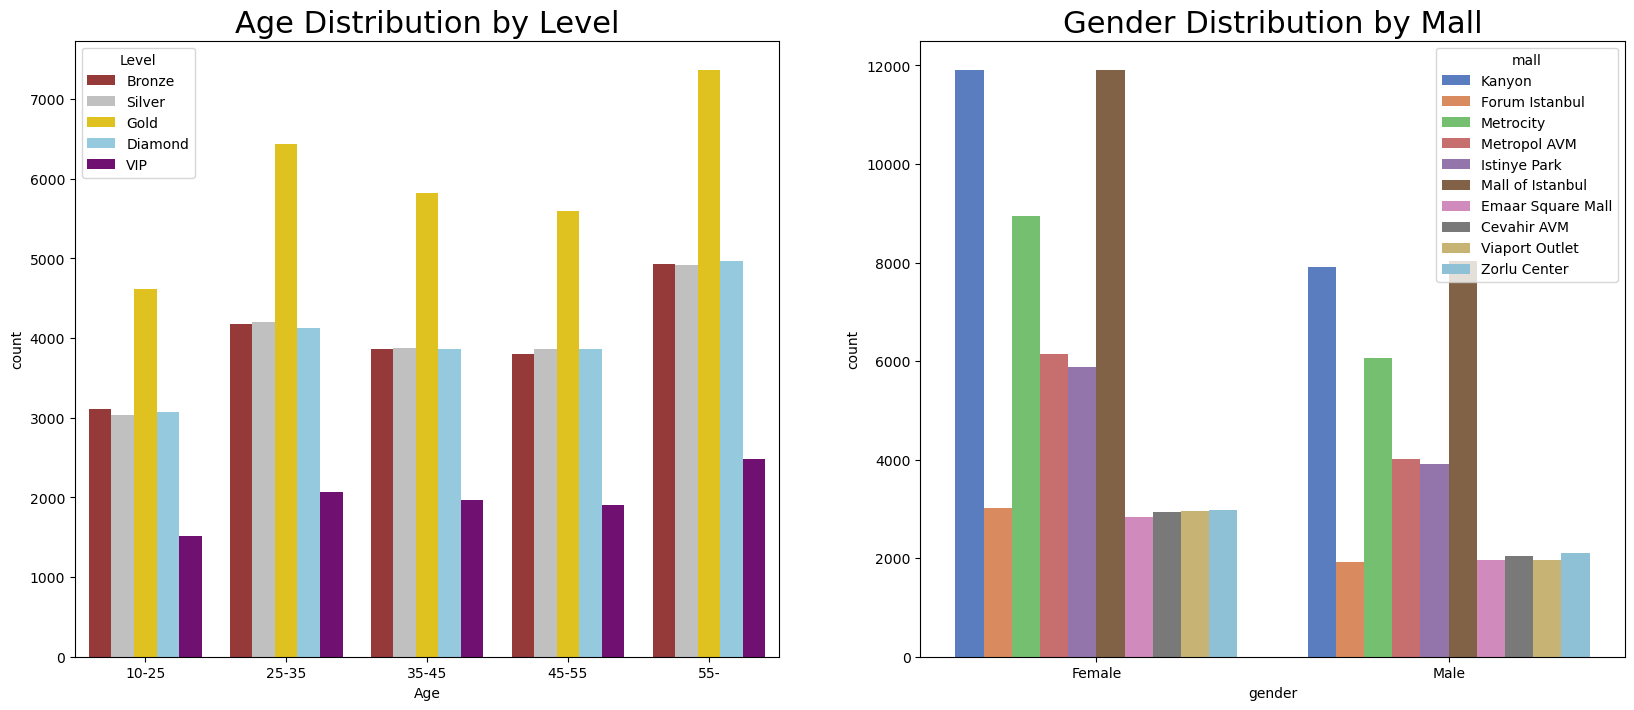

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt 
colors = {'Bronze': 'brown', 'Silver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Silver', 'Gold','Diamond','VIP']
age_columns = ['10-25', '25-35', '35-45','45-55','55-']
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# 나이별 회원 등급 분석
sns.countplot(ax=axes[0], x='Age', hue='Level', data=cs_rfm_df,  palette=colors, order=age_columns, hue_order=order_columns )
axes[0].set_title('Age Distribution by Level', fontsize=22)

# 성별에 따른 브랜드 선호도 
sns.countplot(ax=axes[1], x='gender', hue='mall', data=cs_rfm_df, palette='muted')
axes[1].set_title('Gender Distribution by Mall', fontsize=22)

plt.show()



#### 연령별 회원 등급 통계   

- 평균 등급이 낮은 나이대는 주로 브론즈나 실버 등급이 많을 것으로 예상됩니다. 반면에 평균 등급이 높은 나이대는 골드, 다이아몬드, VIP 등급의 회원이 많을 것으로 예상됩니다.
- 
이러한 분석을 기반으로 다음과 같은 결론을 도출할 수 있습.
- 나이가 증가함에 따라 평균 등급이 상승하는 경향이 있습니다.
- 특히 50대 이후부터 평균 등급이 높아지는 추세를 보입니다.
- 높은 등급의 회원들이 주로 고령층에 속한다는 것을 알 수 있습니다다.

#### 성별에 따른 쇼핑몰 선호 추세 
- 여성 회원이 남성 회원보다 더 많이 이용하는 것을 확인 할 수 있었습니다.
- 
가장 인기 있는 쇼핑몰은 Kanyon 브랜드 였습니다. 그 다음으로 인기 있는 브랜드는 Mall of Istanbul 이였으며, 그 다음으로 Metrocity와 AVM이 주를 이뤘니습니
-
나머지 6개 브랜드는 상대적으로기가 인 적었습니
- 원
남성 회원들에게 가장 인기 있는 쇼핑몰은 Mall of Istanbul 이였으며, 그 다음으로 Kanyon과 Metrocity가습이뤘
니 - 다.
나머지 7개 브랜드는 여성 회원과 비교했을대적으로 인기가 적었습니다.인기가 

> 여성 회원들에게는 Kanyon과 Mall of Istanbul 쇼핑몰에 대한 특별 혜택이나 이벤트를 제공하여 이용을 더욱 촉진할 수 있습니다.>  
남성 회원들에게는 Mall of Istanbul과 Kanyon 쇼핑몰에 대한 프로모션을 강화하여 이용을 늘릴 수 있습니다.

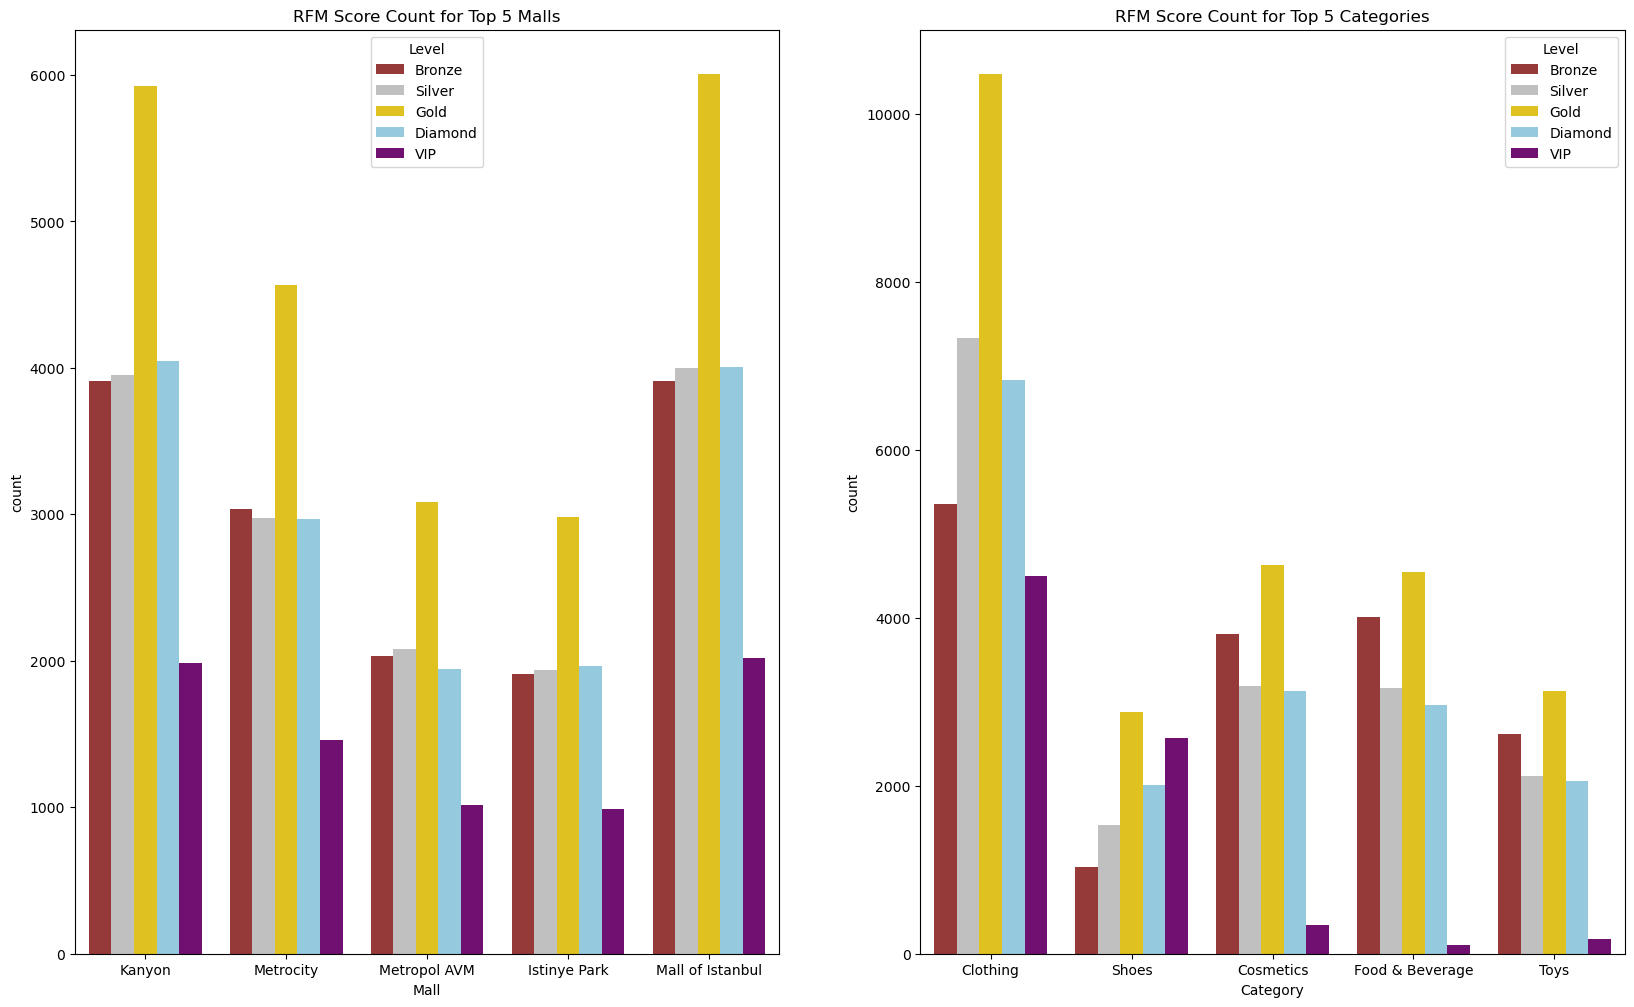

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
colors = {'Bronze': 'brown', 'Silver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}

# 쇼핑몰을 기준으로 상위 5개 추출
top_malls = cs_rfm_df['mall'].value_counts().head(5).index

# 카테고리를 기준으로 상위 5개 추출
top_categories = cs_rfm_df['category'].value_counts().head(5).index

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# 상위 5개 쇼핑몰에 대한 RFM Score Count
sns.countplot(ax=axes[0], x='mall', hue='Level', data=cs_rfm_df[cs_rfm_df['mall'].isin(top_malls)], palette=colors, hue_order=order_columns)
axes[0].set_title('RFM Score Count for Top 5 Malls')
axes[0].set_xlabel('Mall')

# 상위 5개 카테고리에 대한 RFM Score Count
sns.countplot(ax=axes[1], x='category', hue='Level', data=cs_rfm_df[cs_rfm_df['category'].isin(top_categories)], palette=colors, hue_order=order_columns)
axes[1].set_title('RFM Score Count for Top 5 Categories')
axes[1].set_xlabel('Category')

plt.show()




### 등급별 선호 쇼핑몰 마케팅 전략
- 등급별 선호 쇼핑몰을 분석 결과 Mall of istanbul 과 kanyon이 가장 인기가 많았으며 두 그룹 모두 골드 등급의 회원들의 수요가 많았습니다. 그 다음으로 다이아 등급 회원들이 다수를 차지 하였으며 이를 고려하여 두 쇼핑몰 모두 골드 등급 회원을 대상으로 한 특별한 혜택이나 할인 행사를 주도적으로 개최할 수 있습니다.
다이아 등급 회원들의 높은 수요 역시 감안하여, 이들을 대상으로 한 VIP 라운지나 특별 이벤트를 주최하여 더 많은 고객을 유치할 수 있습니다

- 나머지 세 그룹 역시 골드 등급 회원들에게 인기가 많았으며, 골드 등급 이외에도 , 브론즈,실버,다이아 등급의 회원들의 분포가 적절히 분포되어있는것을 확인 할 수 있었습니다. 이는 다양한 등급의 회원들이 쇼핑몰을 이용하고 있으며, 골드 등급 이외의 회원들도 충분한 선택 폭을 가지고 있음을 나타냅니다. 이에 맞춰 이들을 대상으로 한 서비스나 특별 이벤트를 강화함으로써 이들의 만족도를 높일 수 있습니다.

### 등급별 선호 카테고리 마케팅 전략 
- 등급별 선호 카테고리 분석 결과, 모든 등급에서 의류 카테고리가 가장 인기 있는 것으로 나타났습니다. 이는 회원들이 의류에 대한 관심이 높다는 것을 시사합니다. 의류 다음으로는 화장품 카테고리와 음식 카테고리가 높은 인기를 끌었습니다. 
이러한 결과를 바탕으로 마케팅 전략을 수립할 때, 다음과 같은 점을 고려할 수 있습니
- 모든 등급의 회원들이 의류에 관심이 있는 것으로 나타났으므로, 의류 카테고리에 대한 다양한 프로모션 및 할인 이벤트를 개최하여 회원들의 구매를 유도할 수 있습니다. 또한, 의류 브랜드와의 협업을 통해 특별한 혜택을 제공하는 것도 효과적일 수 있습니다.
- 그 다음으로 회원들의 인기가 높은 화장품 카테고리는  고객들을 대상으로 한 특별한 화장품 이벤트나 제공할 수 있는 혜택을 고려할 수 있습니다. 또한, 새로운 화장품 브랜드와의 협업을 통해 회원들의 관심을 유발할 수 있습니다.
- 음식 카테고리 역시 높은 인기를 보이는데, 이는 회원들이 다양한 음식에 대한 관심이 높다는 것을 시사합니다. 음식 카테고리에 대한 특별한 할인 혜택이나 음식점과의 협업을 통해 회원들의 만족도를 높일 수 있습니다. 또한, 회원들의 다양한 식문화에 맞춰 다양한 음식 옵션을 제공하는 것도 중요합니다
- 신발 같은 경우 VIP 등급의 고객들에게 인기가 많은 것을 알 수 있는데 이 점을 참고하여 VIP 회원들을 대상으로 한 VIP 전용 신발 런칭 이벤트 등을 개최하여 제품 구매시 추가 혜택 및 선물 제공을 하는 이벤트를 통해 고객들의 만족도를 높일 수 있을 것 입니다..

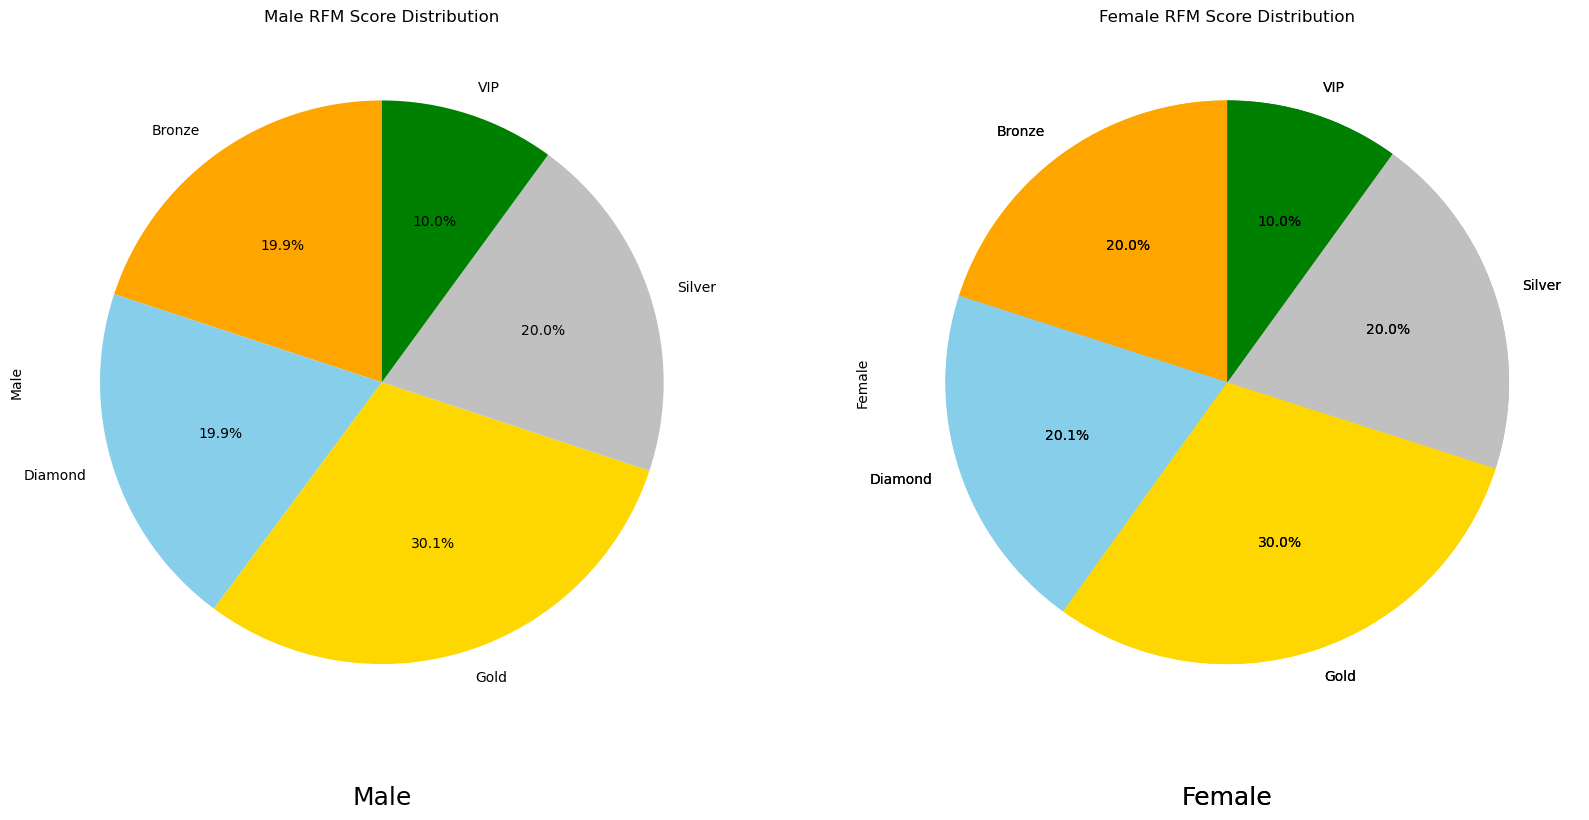

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 색상 지정
colors = {'Bronze': 'orange', 'Silver': 'skyblue', 'Gold': 'gold', 'Diamond': 'silver', 'VIP': 'green'}

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 성별에 따른 멤버 등급 분포
grouped_gender_level = cs_rfm_df.groupby(['gender', 'Level']).size().unstack(fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 첫 번째 파이 차트 (남성)
plt.subplot(1, 2, 1)
grouped_gender_level.loc['Male'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[level] for level in order_columns])
plt.title('Male RFM Score Distribution')
plt.text(0, -1.5, 'Male', fontsize=18, ha='center')

# 두 번째 파이 차트 (여성)
plt.subplot(1, 2, 2)
grouped_gender_level.loc['Female'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[level] for level in order_columns])
plt.title('Female RFM Score Distribution')
plt.text(0, -1.5, 'Female', fontsize=18, ha='center')

# 그래프 표시
plt.show()


#### 성별에 따른 회원 등급 분포 마케팅 전략
- 여성 회원의 수가 59482명, 남성 회원의 수가 39975명으로 여성 회원이 남성 회원 보다 더 많다는 점을 감안하여 분석을 하자면 우선 여성 회원의 경우 가장 많은 비중을 차지한 등급은 골드 등급이며 30 % 를 기록하였고, 실버 등급과 다이아 몬드 등급, 브론즈 등급 모두 대략 20%의 수치를 기록하였습니다. 반면 VIP 등급은 전체 10%를 기록하였습니다. 이러한 분포 결과는 남성 회원의 경우에도 비슷한 양상을 띄고 있습니다. 이를 토대로 결론을 도출하면 여성회원, 남성회원에 둘다 가장 많은 골드 등급을 대상으로 한 특별한 혜택 및 이벤트를 개최하여 회원들의 충성도를 높일 수 있습니다. 또한, 다이아몬드 등급과 실버 등급도 중요한 고객층이므로 이들을 대상으로 한 프로모션을 진행하여 회원들의 만족도를 높이는 것이 중요합니다.

In [35]:
cs_rfm_df[cs_rfm_df['gender'] == 'Female'].value_counts() # 59482명

invoice  id       gender  age  category         quantity  price    payment      date        mall              Subdate  TotalScore  Level  
I100015  C132779  Female  35   Clothing         2         600.16   Debit Card   2021-03-04  Mall of Istanbul  735      1.123426    Bronze     1
I313009  C714192  Female  53   Clothing         2         600.16   Debit Card   2021-11-11  Metropol AVM      483      1.440009    Silver     1
I312947  C124694  Female  27   Technology       2         2100.00  Debit Card   2021-11-05  Mall of Istanbul  489      1.546767    Gold       1
I312949  C528241  Female  28   Clothing         4         1200.32  Debit Card   2022-12-14  Kanyon            85       2.077215    VIP        1
I312964  C255670  Female  51   Technology       2         2100.00  Debit Card   2022-07-22  Metrocity         230      1.872144    Diamond    1
                                                                                                                                             

In [36]:
cs_rfm_df[cs_rfm_df['gender'] == 'Male'].value_counts() # 39975명

invoice  id       gender  age  category    quantity  price    payment      date        mall               Subdate  TotalScore  Level  
I100008  C199951  Male    65   Clothing    5         1500.40  Cash         2022-07-10  Emaar Square Mall  242      1.982884    Diamond    1
I311809  C196599  Male    30   Clothing    1         300.08   Credit Card  2021-09-19  Istinye Park       536      1.339124    Silver     1
I311767  C286041  Male    65   Cosmetics   3         121.98   Cash         2021-09-01  Kanyon             554      1.319020    Silver     1
I311777  C847570  Male    56   Books       4         60.60    Cash         2022-01-15  Cevahir AVM        418      1.485168    Silver     1
I311784  C460177  Male    32   Shoes       2         1200.34  Cash         2023-02-24  Cevahir AVM        13       2.076198    VIP        1
                                                                                                                                         ..
I206554  C305509  Male   

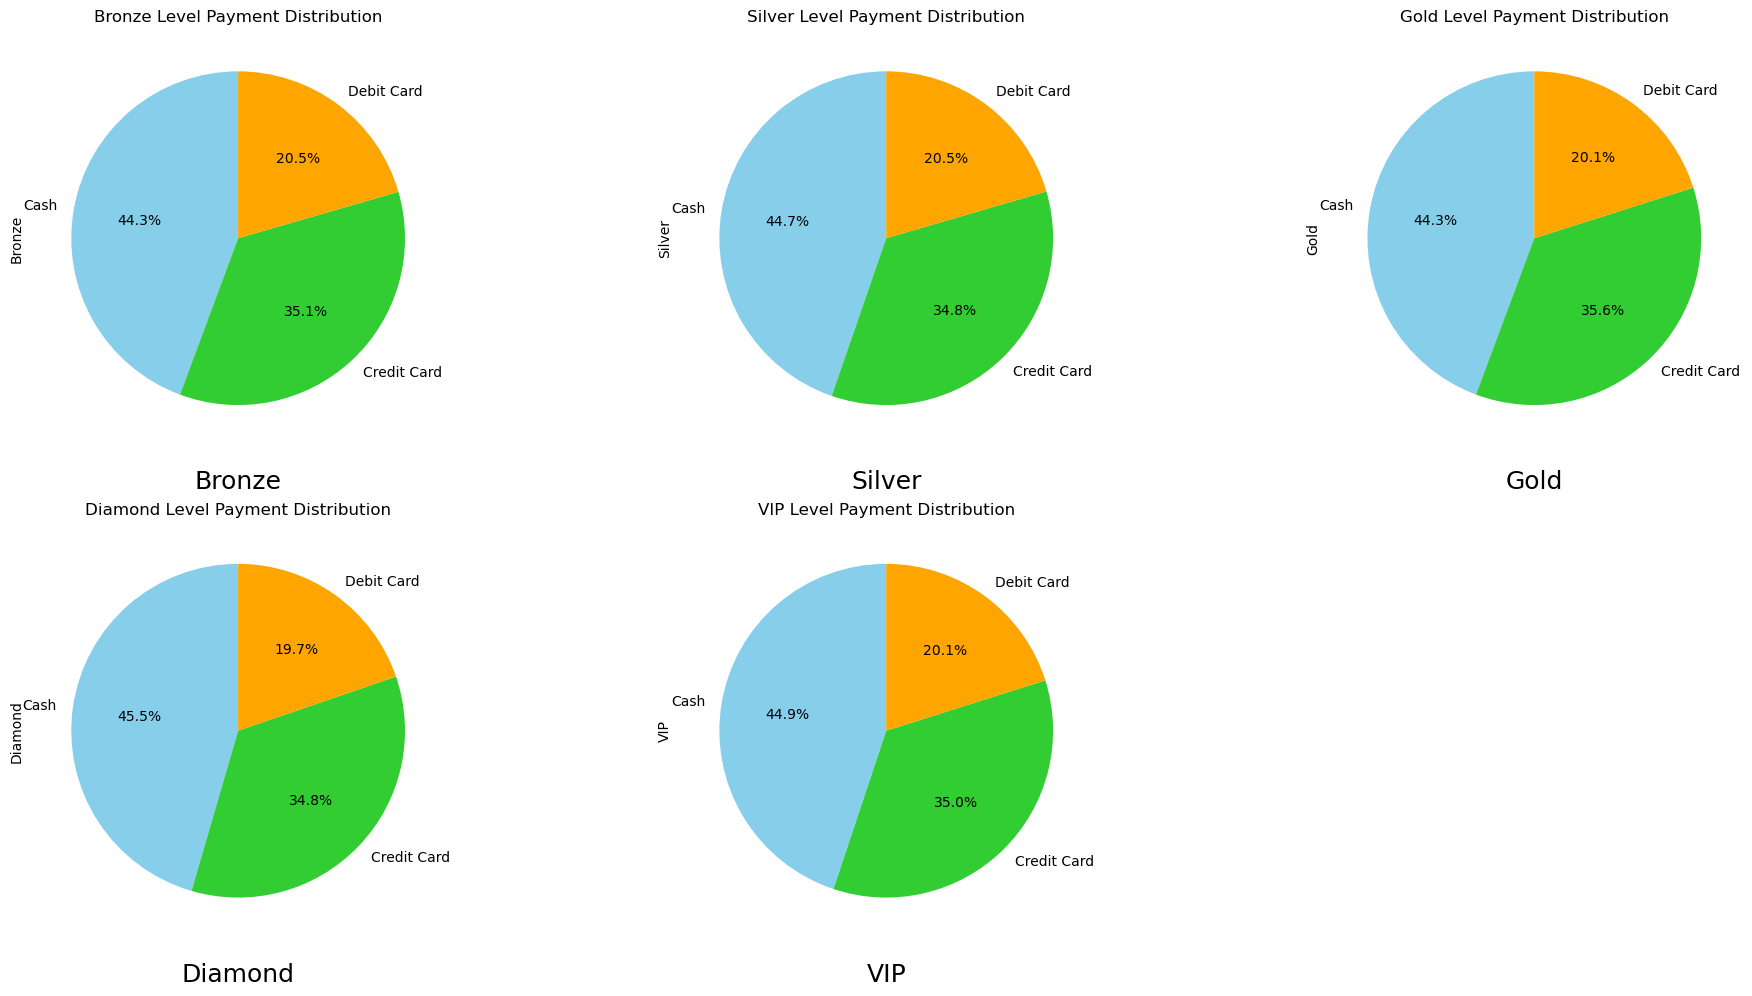

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 색상 지정
colors = {'Credit Card': 'skyblue', 'Cash': 'limegreen', 'Debit Card': 'orange'}

# order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
order_columns = ['Credit Card', 'Cash', 'Debit Card']

# 성별에 따른 멤버 등급 분포
grouped_level_payment = cs_rfm_df.groupby(['Level', 'payment']).size().unstack(fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 첫 번째 파이 차트 (브론즈)
plt.subplot(2, 3, 1)
grouped_level_payment.loc['Bronze'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[payment] for payment in order_columns])
plt.title('Bronze Level Payment Distribution')
plt.text(0, -1.5, 'Bronze', fontsize=18, ha='center')

# 두 번째 파이 차트 (실버)
plt.subplot(2, 3, 2)
grouped_level_payment.loc['Silver'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[payment] for payment in order_columns])
plt.title('Silver Level Payment Distribution')
plt.text(0, -1.5, 'Silver', fontsize=18, ha='center')

# 세 번째 파이 차트 (골드)
plt.subplot(2, 3, 3)
grouped_level_payment.loc['Gold'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[payment] for payment in order_columns])
plt.title('Gold Level Payment Distribution')
plt.text(0, -1.5, 'Gold', fontsize=18, ha='center')

# 네 번째 파이 차트 (다이아몬드)
plt.subplot(2, 3, 4)
grouped_level_payment.loc['Diamond'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[payment] for payment in order_columns])
plt.title('Diamond Level Payment Distribution')
plt.text(0, -1.5, 'Diamond', fontsize=18, ha='center')

# 다섯 번째 파이 차트 (VIP)
plt.subplot(2, 3, 5)
grouped_level_payment.loc['VIP'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[colors[payment] for payment in order_columns])
plt.title('VIP Level Payment Distribution')
plt.text(0, -1.5, 'VIP', fontsize=18, ha='center')

# 그래프 표시
plt.tight_layout()
plt.show()


#### 등급별 결제수단 분석
- 등급별로 결제수단을 분석결과 브론즈부터 VIP 등급 모두 현금결제를 가장 많이 사용했음을 알 수 있으며, 그 다음으로 신용 카드, 직불 카드 순으로 사용하는 것을 알 수 있습니다.
- 이를 토대로 각 매장에서는 현금 결제를 선호하는 고객층을 대상으로 한 특별한 혜택 및 이벤트를 제공함으로써 매장의 매출을 높일 수 있습니다.

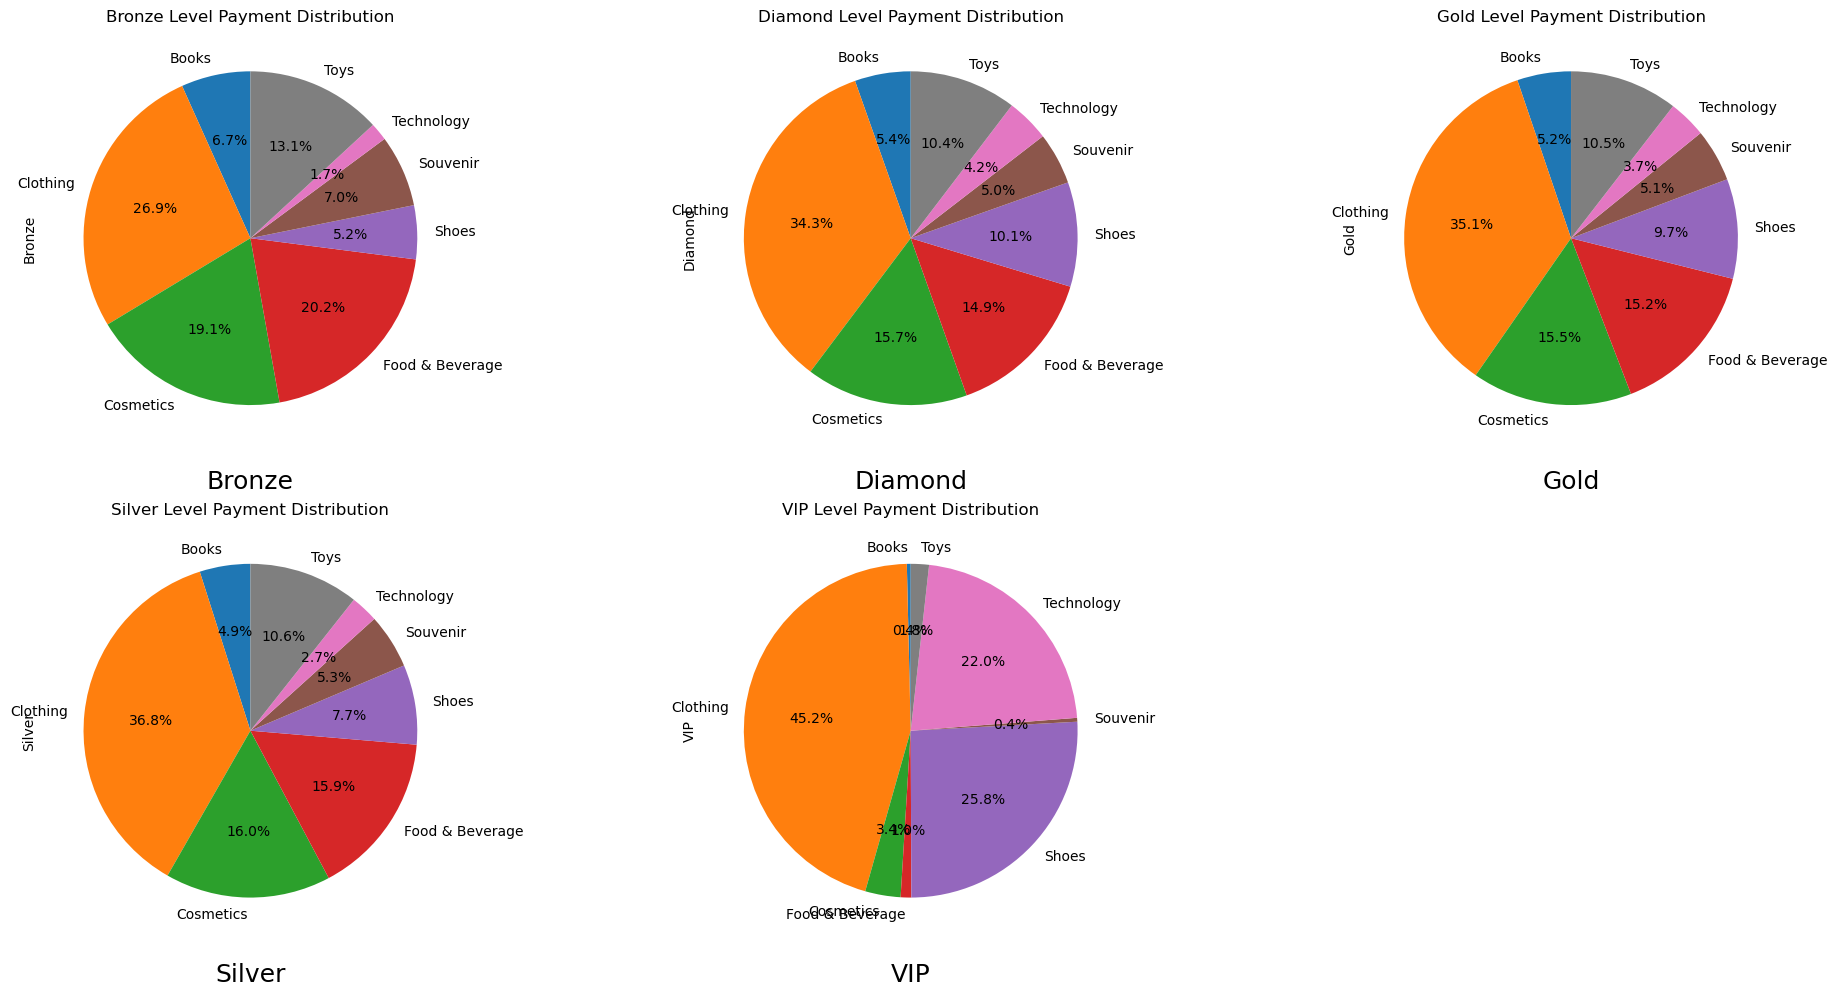

In [226]:
# 등급별 선호하는 결제 수단을 추출
grouped_level_category = cs_rfm_df.groupby(['Level', 'category']).size().unstack(fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 등급별 파이 차트 생성
for i, level in enumerate(grouped_level_category.index):
    plt.subplot(2, 3, i+1)
    grouped_level_category.loc[level].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'{level} Level Payment Distribution')
    plt.text(0, -1.5, level, fontsize=18, ha='center')

# 그래프 표시
plt.tight_layout()
plt.show()


#### 등급별 결제수단 분석 
- 등급별로 선호하는 쇼핑물품을 분석 결과 5개 그룹 모두 의류가 인기가 많은 것을 볼 수 있습니다.
- 그러나 VIP 등급의 경우 다른 4개 그룹에서 인기가 많았던 화장품이 아닌 신발과 전자제품이 인기가 많았습니다.
- 이를 토대로 마케팅 전략을 분석해보면,
-  대다수의 회원이 의류를 선호하고 있으므로, 의류 카테고리에 대한 다양한 프로모션 및 할인 이벤트를 진행하여 구매를 유도할 수 있습니다.
신규 고객을 유치하기 위해 가격이 저렴한 의류 상품을 중점적으로 홍보할 수 있습니다.
- 높은 구매력과 충성도를 가진 VIP 등급의 회원들의 경우 다른 등급과는 다르게 신발과 전자제품에 대한 선호도가 높으므로, 이에 맞춰 특별한 신제품 출시 이벤트나 할인 프로모션을 진행하여 매출을 높일 수 있습니다.6

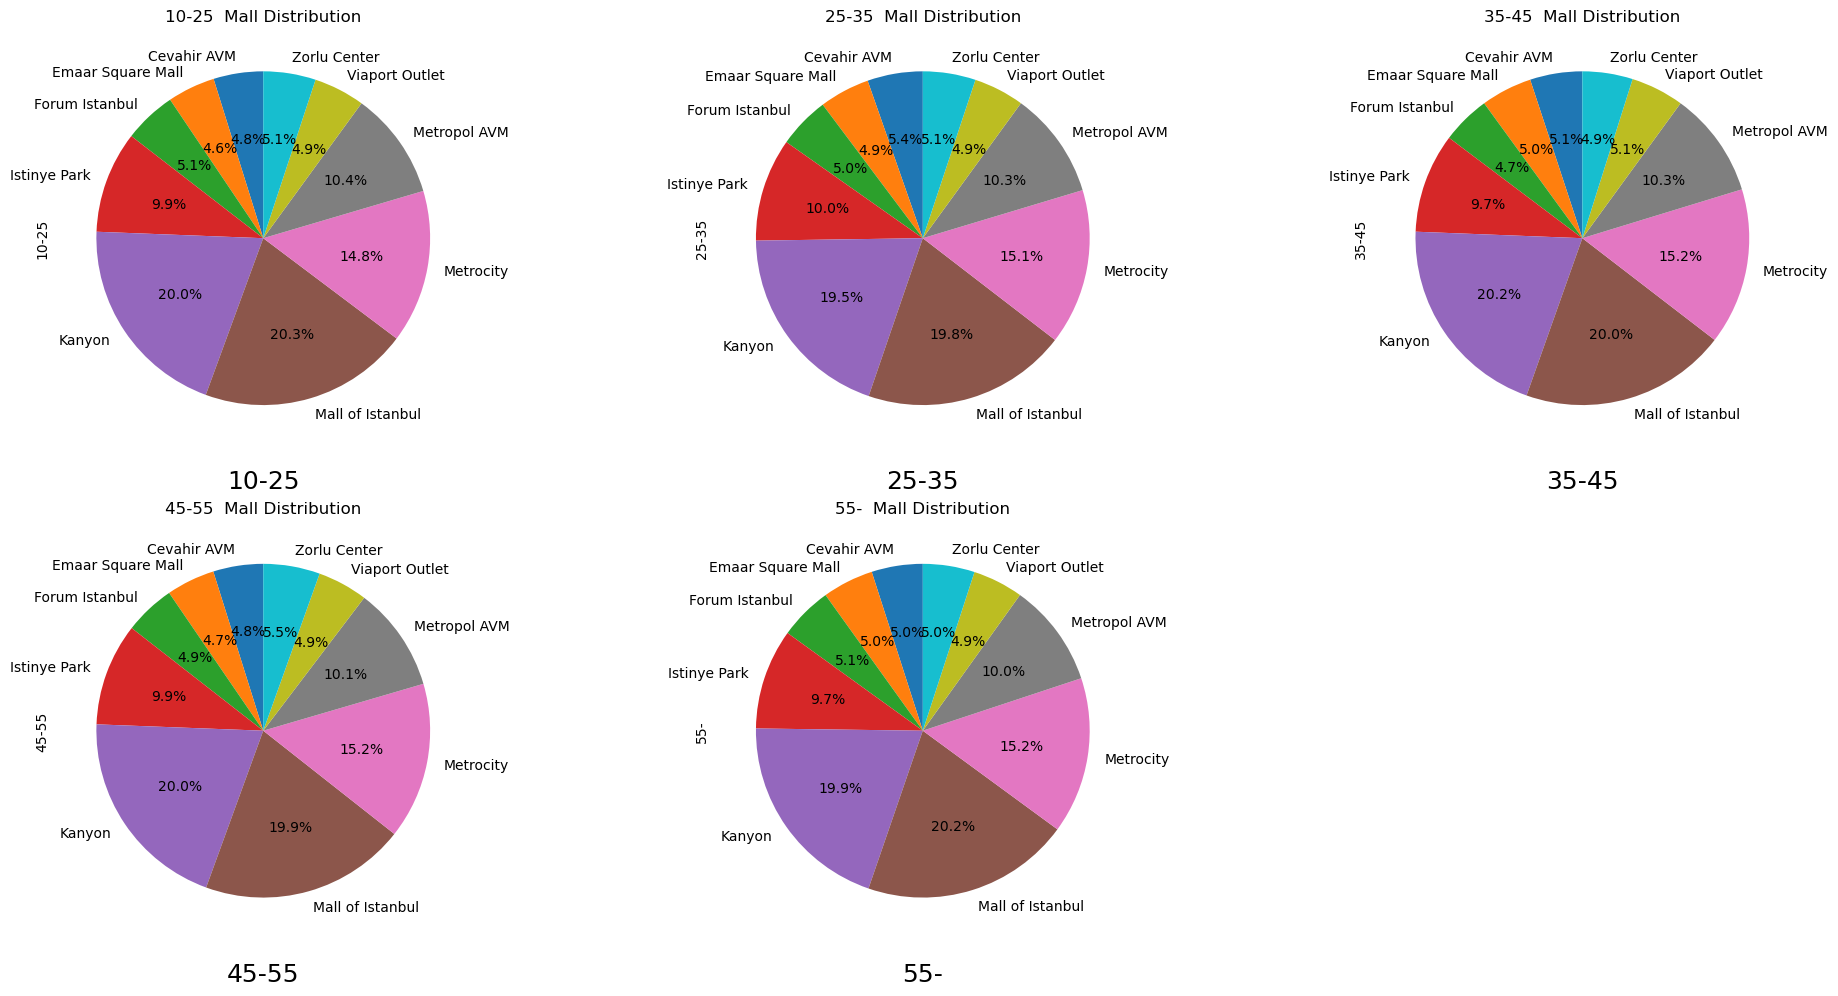

In [242]:
# 연령별 선호 쇼핑몰 & 카테고리 분석 
# 등급별 선호하는 결제 수단을 추출
grouped_age_mall = cs_rfm_df.groupby(['Age', 'mall']).size().unstack(fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 등급별 파이 차트 생성
for i, age in enumerate(grouped_age_mall.index):
    plt.subplot(2, 3, i+1)
    grouped_age_mall.loc[age].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'{age}  Mall Distribution')
    plt.text(0, -1.5, age, fontsize=18, ha='center')

# 그래프 표시
plt.tight_layout()
plt.show()


#### 연령별 선호 쇼핑몰 마케팅 분석 
- 연령별로 선호 쇼핑몰 분석 결과 전 연령층에서 인기가 많은 쇼핑몰은 Kanyon 이라는 쇼핑몰이였으며, 그 다음으로 인기가 많은 쇼핑몰은 Mall of Istanbul, 그 뒤로는 Metrocity와 Metropol AVM이 순위를 차지 하였으며, 이외 쇼핑몰들은 비슷한 분포를 보이는 것을 확인 할 수 있었습니다.
- 전 연령층의 선호하는 쇼핑몰의 분포가 비슷하였으며 이 결과를 토대로 각 쇼핑몰에서 제공하는 상품 라인업을 분석하여 유사한 상품을 보유하고 있는 다른 쇼핑몰과의 협력을 통해 고객들에게 다양한 상품 선택지를 제공할 수 있습니다. 아래의 시각화 그래프 에서 쇼핑몰별 제공하는 상품 라인업을 분석 하겠습니다.

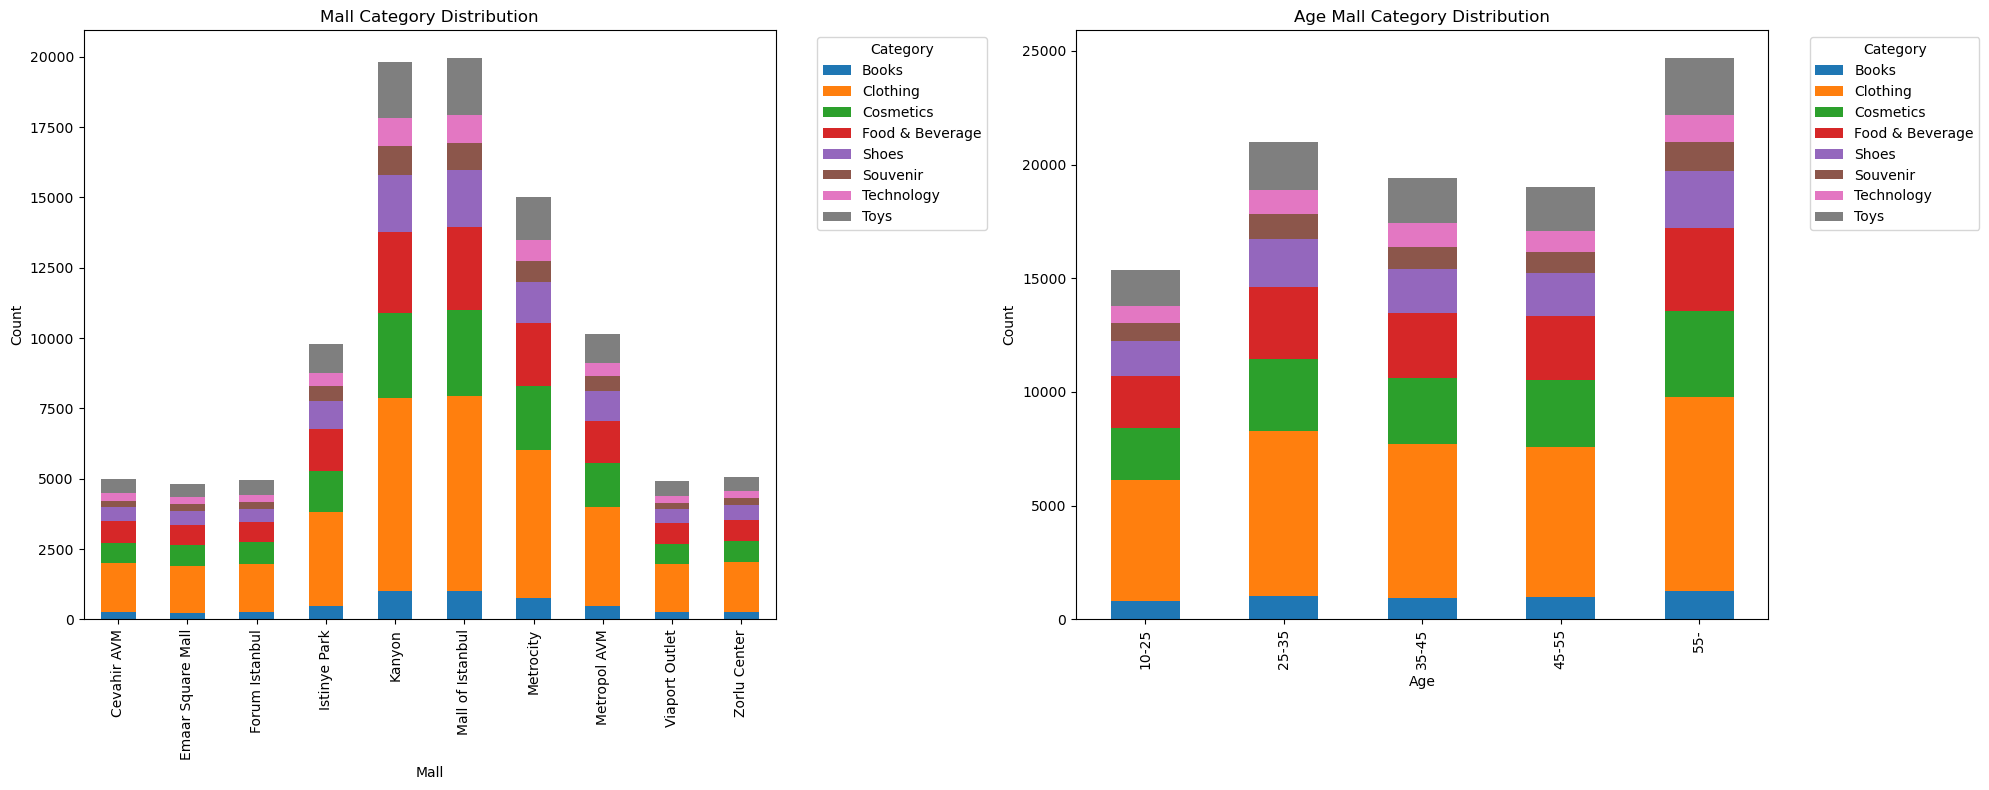

In [241]:
# 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 쇼핑몰별 카테고리 분석 차트
grouped_mall_category.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Mall Category Distribution')
axes[0].set_xlabel('Mall')
axes[0].set_ylabel('Count')
axes[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# 연령별 선호 쇼핑몰 카테고리 분석 차트
grouped_age_category.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Age Mall Category Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()


#### 쇼핑몰 별 카테고리 분석 & 연령 별 선호 카테고리 분석 
- Kanyon 같은 경우 의류를 가장 많이 판매 하고 있었으며, 화장품과 식품은 동일한 수치를 보이며 많은 고객들에게 인기가 있었던 Mall of Istanbul과 동일한 수치를 보입니다. 다른 쇼핑몰들도 마찬가지로 의류품이 가장 많았으며 이외에도 비슷한 수치를 보였습니다.
- 전연령층이 선호하는 쇼핑물품은 의류가 1위를 차지하였으며, 그 다음으로 식료품이 순위를 차지하였고, 화장품도 비슷한 수치를 보였습니다.
- 그러나 55세 이상의 연령층의 경우 신발도 높은 수치를 보이는 것을 알 수 있었는데 이 55세 이상의 연령층에서 VIP 등급의 회원 수치가 높았던 만큼 연령별 선호 카테고리 역시 신발이 꽤 높은 수치를 보였음을 알 수 있습니다. 25세 이상 35세 이하 연령층의 경우에도 VIP 등급의 수치가 다른 연령대보다 높았던 만큼 신발의 선호도가 높은 것을 볼 수 있습니다.
- 이를 토대로 마케팅 분석을 하겠습니다.
> 의류 카테고리는 모든 연령층에서 높은 선호도를 보이고 있으므로 의류 카테고리에 대한 마케팅 활동을 지속적으로 강화할 필요가 있습니다. 특히나 Kanyon과 같은 쇼핑몰에서는 의류 카테고리에 대한 프로모션 및 이벤트를 활발히 진행하여 고객들의 관심을 유지하고 매출을 증대 할 수 있습니다.
또한 식품 카테고리는 전연령층에서 높은 인기를 누리고 있으므로 쇼핑몰에서는 식품 카테고리에 대한 다양한 상품 라인업을 유지하고 고품질의 제품을 제공하는 것이 중요합니다. 이를 통해 고객들의 만족도를 높이고 충성 고객을 유치할 수 있습니다.
더불어 화장품 카테고리 역시 많은 고객들에게 인기가 있으므로 쇼핑몰에서는 화장품 브랜드와의 협력을 통해 다양한 프로모션 및 할인 행사를 진행하여 화장품 카테고리에 대한 고객들의 관심을 끌어야 합니다.
특히 55세 이상의 연령층과 25세 이상 35세 이하 연령층에서는 신발 카테고리에 대한 관심이 높은 것으로 나타났습니다. 이 연령대의 고객들은 VIP 등급의 회원  다른 연령대에 비해수치가 높기 때문에 신발 카테고리에 대한 마케팅 활동을 강화하여 이들의 선호도를 충족시키는 제품 및 서비스를 제공하는 것이 중요합니다. 이를 통해 VIP 고객들의 만족도를 높이고 장기적인 고객 유치를 이룰 수 있습니다.